7
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 

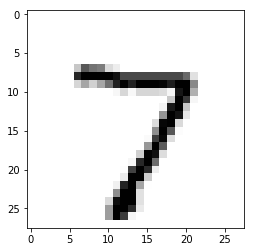

In [30]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # input, hidden, output node set
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # set weight 
        # in->hi , hi -> out
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        
        # learning rate
        self.lr = learningrate
        
        # activation function
        self.activation_function = lambda x: scipy.special.expit(x)

        pass
    
    
    def train(self, inputs_list, targets_list):
        # change two-dimensional matrix
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Calculate input for hidden
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Calculate output for hidden
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # final for input
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # final for output
        final_outputs = self.activation_function(final_inputs)
        
        # errer value  
        output_errors = targets - final_outputs
        # hidden error = Calculated by recombination output error 
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # Update weights(hidden, output)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # Update weights(input, hidden)
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        # Convert the input list to a two-dimensional matrix
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # Calculate input for hidden
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # Calculate output for hidden
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate final input
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # Calculate final output
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

# set input, hidden, output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# set learning rate
learning_rate = 0.3

# create test of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# read csv 
training_data_file = open("../csv/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# Learning Neural Network

#Search all records in a collection of learning data
for record in training_data_list:
    # Separation ,
    all_values = record.split(',')
    # Adjust value(0.1 ~ 0.99)
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) +0.01
    targets = numpy.zeros(output_nodes) + 0.01
    # 0 = 99
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

# read test csv
test_data_file = open("../csv/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#get the first test record
all_values = test_data_list[0].split(',')
#print the label
print(all_values[0])

#show first num
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

# test neural network

# reset
scorecard = []

# Explore all records in a collection of test data
for record in test_data_list:
    all_values = record.split(',')
    # The correct answer is the first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # Adjust range and value
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01
    # query for neuralNetwork
    outpus= n.query(inputs)
    # answer for max
    label = numpy.argmax(outpus)
    print (label, "network's answer")
    # cheak true or false
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

# calculate the performance socre
scorecard_array = numpy.asarray(scorecard)
print("performanc =  ",scorecard_array.sum() / scorecard_array.size)

In [18]:
test_data_file = open("../csv/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [ ]:
import numpy
import matplotlib.pyplot
%matplotlib inline

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [20]:
test_data_file = open("../csv/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [21]:
#get the first test record
all_values = test_data_list[0].split(',')
#print the label
print(all_values[0])

7


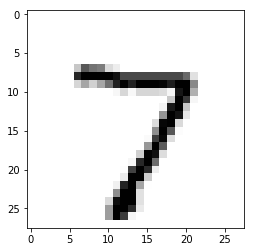

In [22]:
import numpy
import matplotlib.pyplot
%matplotlib inline

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [23]:
n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01)

array([[  9.29322105e-03],
       [  6.94029604e-03],
       [  1.16282165e-02],
       [  1.72618926e-02],
       [  4.62534950e-04],
       [  2.05817031e-02],
       [  4.46803908e-03],
       [  9.72116962e-01],
       [  7.47143896e-03],
       [  3.84436944e-03]])

In [24]:
# test neural network

# reset
scorecard = []

# Explore all records in a collection of test data
for record in test_data_list:
    all_values = record.split(',')
    # The correct answer is the first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # Adjust range and value
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01
    # query for neuralNetwork
    outpus= n.query(inputs)
    # answer for max
    label = numpy.argmax(outpus)
    print (label, "network's answer")
    # cheak true or false
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass


7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

In [27]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [28]:
# calculate the performance socre
scorecard_array = numpy.asarray(scorecard)
print("performanc =  ",scorecard_array.sum() / scorecard_array.size)

performanc =   0.9421
